## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
### Faktorenanalyse und IRT-Analyse der Fragegruppen im Likert-Format

In [1]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Kienberger_2018-19_IRT.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16")

In [2]:
MyData[MyData == 0] <- NA

#### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst.

In [3]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [4]:
vec_AQ2 <- get_vec(MyData,"A.Q2")
vec_AQ3 <- get_vec(MyData,"A.Q3")
vec_CQ1 <- get_vec(MyData,"C.Q1")

In [5]:
vec_ACQ <- c(vec_AQ2,vec_AQ3,vec_CQ1)

#### Funktion für Datenformat (Integer)

In [6]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Deskriptive Analyse

In [7]:
library("psych")

In [8]:
describe(MyData[vec_AQ2])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A.Q2_1,1,333,2.549550,1.0872099,3,2.498127,1.4826,1,5,4,0.3148793,-0.48244715,0.05957874
A.Q2_2,2,333,3.555556,0.8681483,4,3.569288,1.4826,1,5,4,-0.3081259,0.27293388,0.04757423
A.Q2_3,3,333,3.816817,0.9722441,4,3.917603,1.4826,1,5,4,-0.6485882,-0.02897082,0.05327865
A.Q2_4,4,333,4.021021,1.0012836,4,4.142322,1.4826,1,5,4,-0.7059681,-0.40685106,0.05487000
A.Q2_5,5,333,3.462462,0.9860179,4,3.486891,1.4826,1,5,4,-0.2717765,-0.39150827,0.05403345
A.Q2_6,6,333,3.288288,1.1490231,3,3.337079,1.4826,1,5,4,-0.3148890,-0.69045751,0.06296608
A.Q2_7,7,333,4.309309,0.8557762,5,4.453184,0.0000,1,5,4,-1.3247255,1.67208937,0.04689624


In [9]:
describe(MyData[vec_AQ3])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A.Q3_1,1,332,3.060241,1.2226404,3,3.075188,1.4826,1,5,4,-0.12441555,-0.88184673,0.06710111
A.Q3_2,2,332,3.960843,0.9432395,4,4.063910,1.4826,1,5,4,-0.69768838,-0.08583401,0.05176699
A.Q3_3,3,332,2.996988,1.2972164,3,2.996241,1.4826,1,5,4,-0.16001424,-1.05604225,0.07119400
A.Q3_4,4,332,2.867470,1.1739477,3,2.857143,1.4826,1,5,4,-0.02207803,-0.85029684,0.06442875
A.Q3_5,5,332,2.487952,1.2178826,2,2.424812,1.4826,1,5,4,0.31805385,-1.03735203,0.06683999
A.Q3_6,6,332,3.704819,1.1007719,4,3.812030,1.4826,1,5,4,-0.68717013,-0.21299914,0.06041271
A.Q3_7,7,332,3.475904,1.1513912,4,3.541353,1.4826,1,5,4,-0.39125489,-0.69298174,0.06319080
A.Q3_8,8,332,3.554217,1.1711849,4,3.642857,1.4826,1,5,4,-0.49010764,-0.63160484,0.06427712
A.Q3_9,9,332,3.879518,1.0731279,4,4.011278,1.4826,1,5,4,-0.74006706,-0.16009422,0.05889554
A.Q3_28,10,331,3.743202,1.0576879,4,3.845283,1.4826,1,5,4,-0.57956289,-0.25203905,0.05813578


In [10]:
describe(MyData[vec_CQ1])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
C.Q1_1,1,325,3.467692,0.8869958,4,3.517241,1.4826,1,5,4,-0.6036407,0.3604065,0.04920168
C.Q1_2,2,325,3.643077,1.1035813,4,3.735632,1.4826,1,5,4,-0.5556144,-0.3642084,0.06121568
C.Q1_3,3,325,3.744615,1.1052667,4,3.873563,1.4826,1,5,4,-0.8393923,0.1018975,0.06130916
C.Q1_4,4,325,4.390769,0.8413912,5,4.555556,0.0000,1,5,4,-1.6389895,2.9258271,0.04667199
C.Q1_5,5,325,4.406154,0.7665614,5,4.544061,0.0000,1,5,4,-1.5694254,3.5227132,0.04252117
C.Q1_6,6,325,4.298462,0.8278509,4,4.425287,1.4826,1,5,4,-1.3149239,2.1045537,0.04592091
C.Q1_7,7,325,2.560000,1.1680944,2,2.478927,1.4826,1,5,4,0.4406120,-0.5853711,0.06479422


### Explorative Faktorenanalyse

In [102]:
#items.parallel <- fa.parallel(convert_data(MyData,c(vec_ACQ)), fa="both")

In [103]:
#FA_ACQ <- fa(convert_data(MyData,vec_ACQ), nfactors = 8, rotate = "varimax")
#diagram(FA_ACQ)

Versuchsweise wurden Tests mit Kombinationen der Itemgruppen AQ2, AQ3 und CQ1 durchgeführt. Diese Tests zeigen zum einen inhaltliche Ähnlichkeiten, wo diese zu erwarten sind, zum anderen, dass eine getrennte Analyse dieser Teile der Befragung zu bevorzugen ist.

#### AQ2

Parallel analysis suggests that the number of factors =  3  and the number of components =  3 


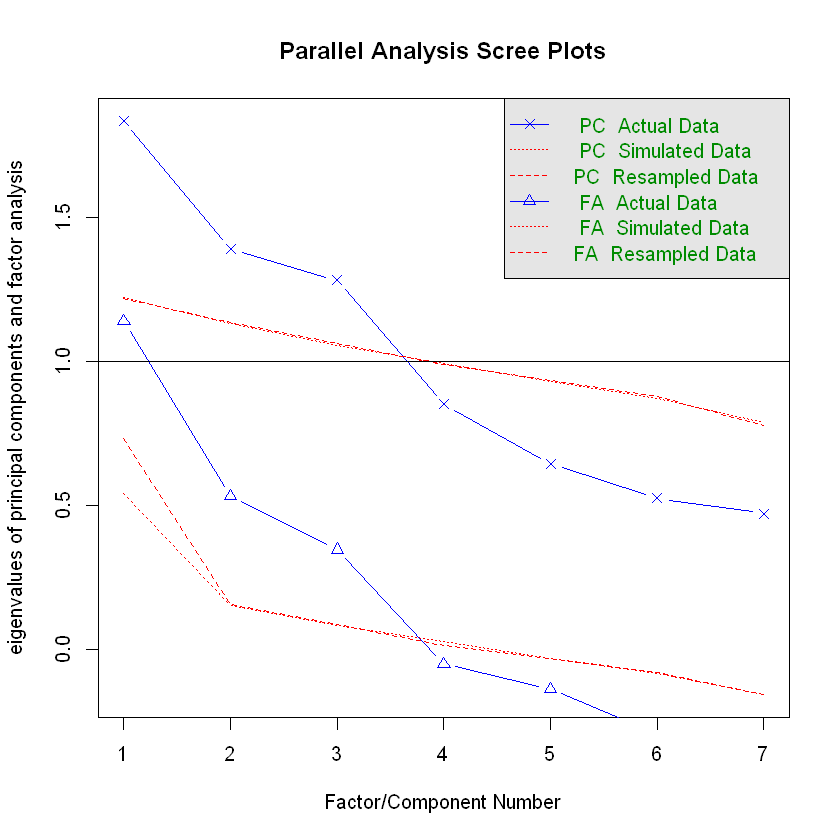

In [104]:
items.parallel <- fa.parallel(convert_data(MyData,c(vec_AQ2)), fa="both")

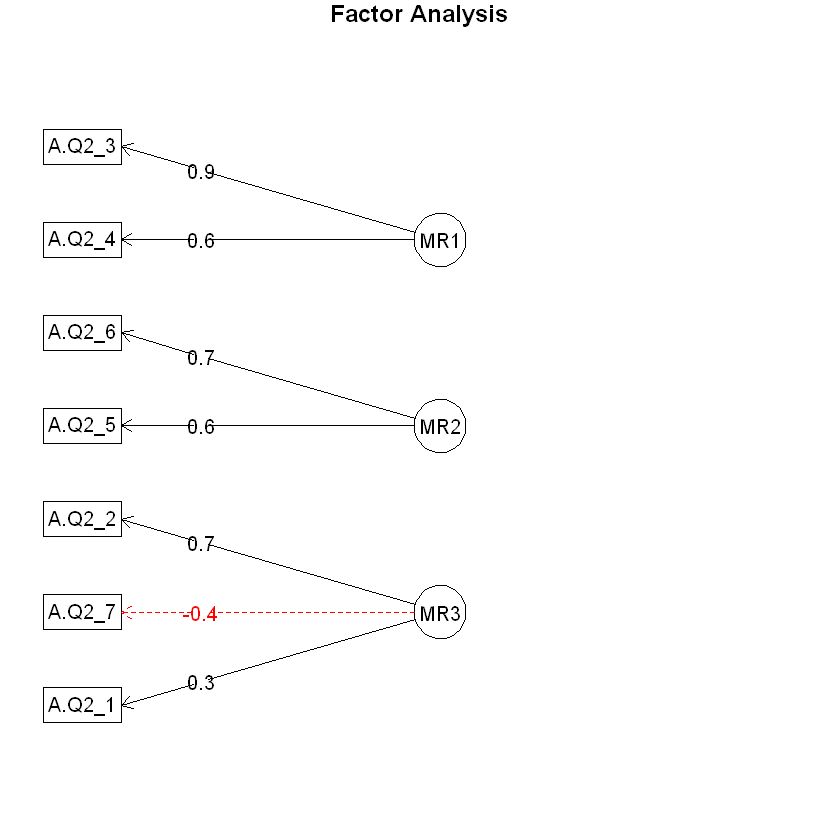

In [95]:
FA_AQ2 <- fa(convert_data(MyData,vec_AQ2), nfactors = 3, rotate = "varimax")
diagram(FA_AQ2)

In [107]:
FA_AQ2

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ2), nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
         MR1   MR2   MR3   h2   u2 com
A.Q2_1  0.02 -0.04  0.35 0.12 0.88 1.0
A.Q2_2  0.30  0.01  0.72 0.60 0.40 1.3
A.Q2_3  0.89 -0.04 -0.02 0.80 0.20 1.0
A.Q2_4  0.55 -0.09  0.06 0.32 0.68 1.1
A.Q2_5  0.00  0.64 -0.04 0.41 0.59 1.0
A.Q2_6 -0.14  0.71 -0.09 0.54 0.46 1.1
A.Q2_7  0.16  0.08 -0.36 0.17 0.83 1.5

                       MR1  MR2  MR3
SS loadings           1.24 0.94 0.78
Proportion Var        0.18 0.13 0.11
Cumulative Var        0.18 0.31 0.42
Proportion Explained  0.42 0.32 0.26
Cumulative Proportion 0.42 0.74 1.00

Mean item complexity =  1.2
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  21  and the objective function was  0.81 with Chi Square of  265.91
The degrees of freedom for the model are 3  and the objective function was  0 



#### AQ3

Parallel analysis suggests that the number of factors =  6  and the number of components =  5 


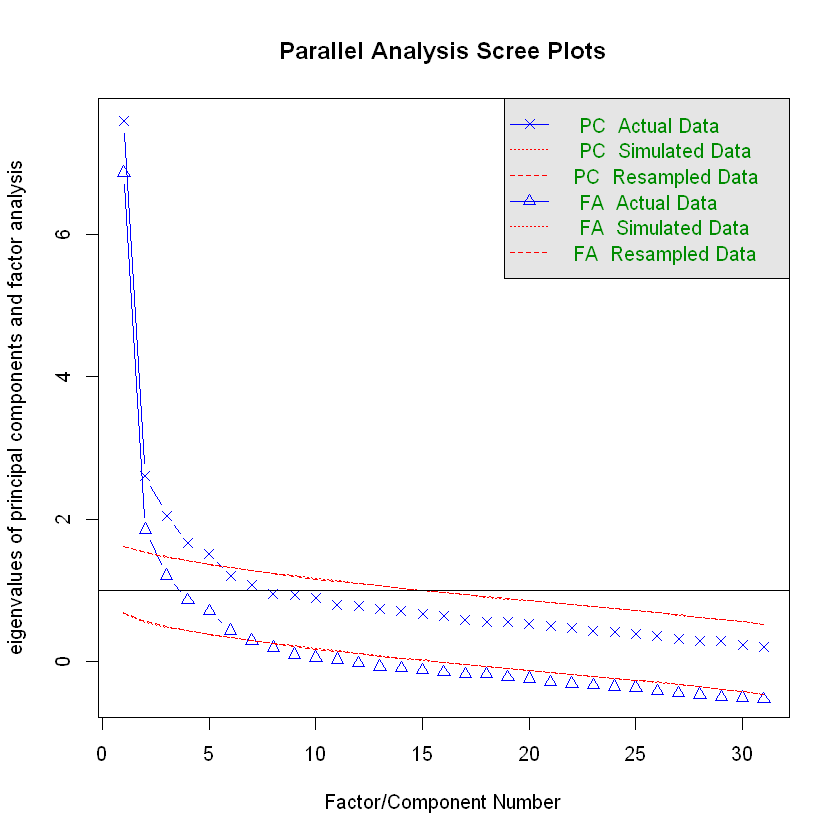

In [100]:
items.parallel <- fa.parallel(convert_data(MyData,c(vec_AQ3)), fa="both")

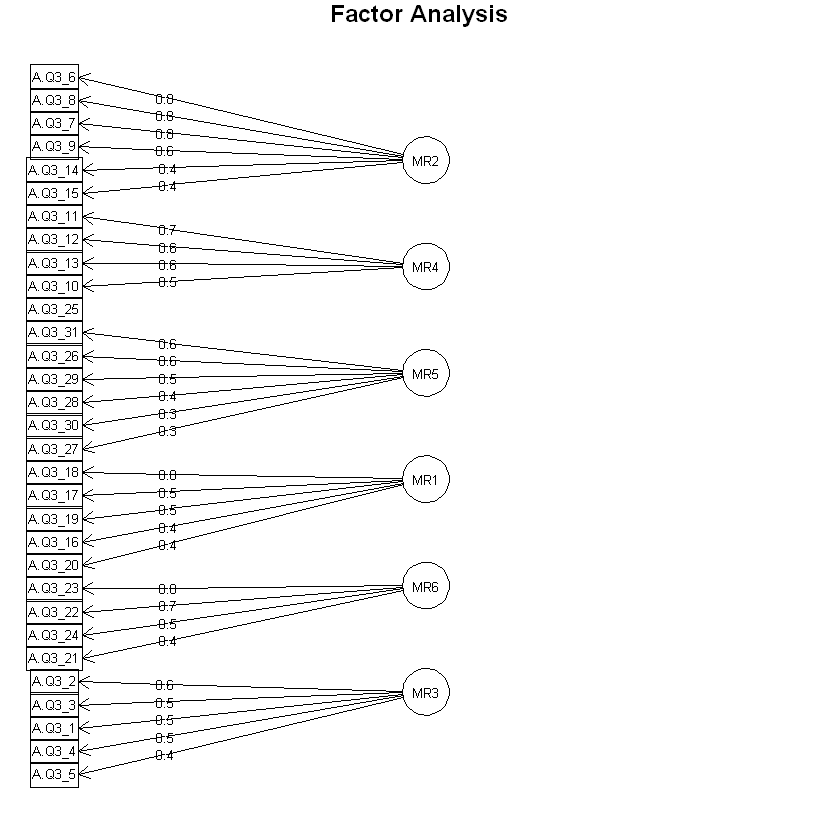

In [14]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 6, rotate = "varimax")
diagram(FA_AQ3)

In [15]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR4   MR5   MR1   MR6   MR3    h2   u2 com
A.Q3_1  -0.04  0.01  0.01  0.05 -0.04  0.48 0.235 0.76 1.1
A.Q3_2   0.08 -0.22  0.13  0.09  0.02  0.62 0.470 0.53 1.4
A.Q3_3  -0.02  0.02  0.10  0.12  0.02  0.51 0.285 0.71 1.2
A.Q3_4  -0.03  0.11  0.08 -0.07  0.17  0.47 0.278 0.72 1.5
A.Q3_5   0.19  0.31  0.06  0.03  0.09  0.44 0.335 0.66 2.4
A.Q3_6   0.81  0.14  0.02  0.11 -0.02  0.09 0.692 0.31 1.1
A.Q3_7   0.79  0.18  0.10  0.11 -0.03  0.02 0.684 0.32 1.2
A.Q3_8   0.80  0.19  0.07  0.10  0.04 -0.06 0.702 0.30 1.2
A.Q3_9   0.56  0.12  0.20  0.05  0.10  0.02 0.376 0.62 1.5
A.Q3_28  0.21  0.14  0.41  0.12  0.11  0.11 0.269 0.73 2.3
A.Q3_10  0.42  0.47  0.21  0.02  0.04 -0.07 0.450 0.55 2.4
A.Q3_11  0.25  0.71  0.19  0.08  0.07  0.01 0.612 0.39 1.4
A.Q3_12  0.27  0.61  0.18  0.13  0.03  0.04 0.4

#### Hypothese zum Ergebnis der explorativen Faktorenanalyse:

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* MR3: interlinguale Hinweise (inkl. Ethymologie)
* MR4: engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* MR5: metakognitive Strategien
* MR6: Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation


#### CQ1

Parallel analysis suggests that the number of factors =  3  and the number of components =  2 


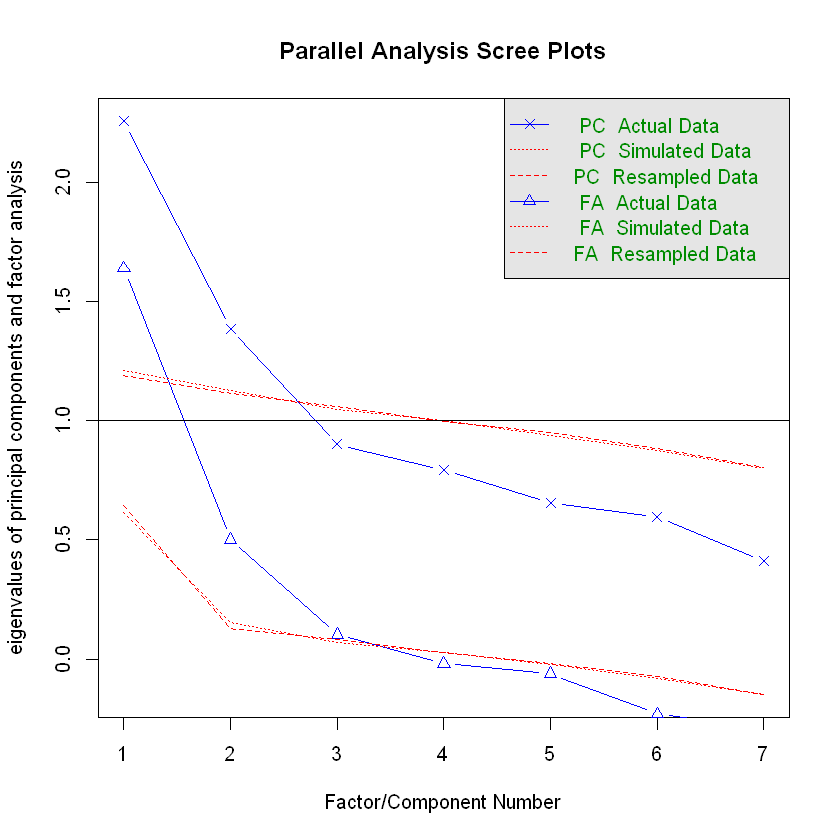

In [106]:
items.parallel <- fa.parallel(convert_data(MyData,c(vec_CQ1)), fa="both")

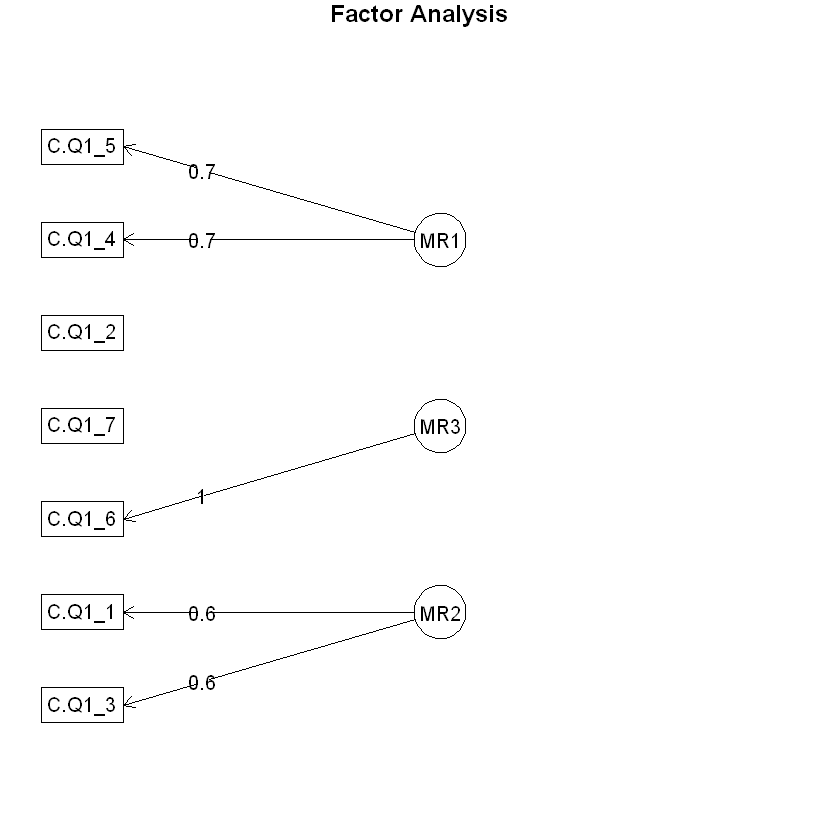

In [98]:
FA_CQ1 <- fa(convert_data(MyData,vec_CQ1), nfactors = 3, rotate = "varimax")
diagram(FA_CQ1)

In [101]:
FA_CQ1

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_CQ1), nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
         MR1   MR3  MR2   h2     u2 com
C.Q1_1  0.19  0.05 0.62 0.43 0.5736 1.2
C.Q1_2  0.25  0.24 0.06 0.12 0.8779 2.1
C.Q1_3  0.10  0.02 0.60 0.37 0.6322 1.1
C.Q1_4  0.66  0.13 0.11 0.46 0.5403 1.1
C.Q1_5  0.72  0.17 0.34 0.66 0.3414 1.6
C.Q1_6  0.19  0.98 0.03 1.00 0.0042 1.1
C.Q1_7 -0.24 -0.20 0.23 0.15 0.8508 3.0

                       MR1  MR3  MR2
SS loadings           1.14 1.11 0.93
Proportion Var        0.16 0.16 0.13
Cumulative Var        0.16 0.32 0.45
Proportion Explained  0.36 0.35 0.29
Cumulative Proportion 0.36 0.71 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  21  and the objective function was  1.02 with Chi Square of  335.04
The degrees of freedom for the model are 3  and the objective function w

### GRM

In [17]:
library("ltm")

Loading required package: MASS
Loading required package: msm
Loading required package: polycor

Attaching package: 'polycor'

The following object is masked from 'package:psych':

    polyserial


Attaching package: 'ltm'

The following object is masked from 'package:psych':

    factor.scores



In [18]:
matrix_AQ3 <- convert_data(MyData,vec_AQ3)

In [19]:
get_fitems <- function(F,f,thr){
    names(F$loadings[F$loadings[,f] > thr, f])
}

In [20]:
get_datagrm <- function(df,F,f,thr,type='factor'){
    if (type == 'factor'){
        DF <- data.frame(apply(df[get_fitems(F,f,thr)],2,as.factor))
    }else {
        DF <- data.frame(apply(df[get_fitems(F,f,thr)],2,as.numeric))
    }
    DF
}

#### GRM-Funktion

In [21]:
grm_full <- function (df,F,f,thr){
    results <- list()
    results$rcor <- rcor.test(get_datagrm(df,F,f,thr), method = "kendall")
    results$fit1 <- grm(get_datagrm(df,F,f,thr), constrained = TRUE)
    results$fit2 <- grm(get_datagrm(df,F,f,thr), constrained = FALSE)
    results$anova <- anova(results$fit1,results$fit2)
    results$margins1 <- margins(results$fit1)
    results$margins2 <- margins(results$fit2)
    results$info1 <- information(results$fit1, c(-4, 4))
    results$info2 <- information(results$fit2, c(-4, 4))
    results$alpha <- alpha(get_datagrm(df,F,f,thr,type='num'))
    results
}

#### Cronbachs Alpha und Inter-Item-Korrelation für AQ3

In [22]:
GRM_AQ3 <- data.frame(apply(MyData[,vec_AQ3],2,as.factor))

In [23]:
alpha(data.frame(apply(MyData[,vec_AQ3],2,as.numeric)),check.keys = TRUE)


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_AQ3], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd
      0.88      0.89    0.92       0.2 7.8 0.0091  3.4 0.53

 lower alpha upper     95% confidence boundaries
0.87 0.88 0.9 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_1       0.89      0.89    0.92      0.21 8.0   0.0088
A.Q3_2       0.88      0.89    0.92      0.21 7.9   0.0090
A.Q3_3       0.89      0.89    0.92      0.21 7.8   0.0090
A.Q3_4       0.88      0.89    0.92      0.21 7.9   0.0090
A.Q3_5       0.88      0.88    0.92      0.20 7.6   0.0093
A.Q3_6       0.88      0.88    0.91      0.20 7.5   0.0094
A.Q3_7       0.88      0.88    0.91      0.20 7.4   0.0095
A.Q3_8       0.88      0.88    0.91      0.20 7.4   0.0095
A.Q3_9       0.88      0.88    0.91      0.20 7.5   0.0094
A.Q3_28      0.88      0.88    0.91      0.20 7.5   0.0094
A.Q3_10  

#### GRM MR1

In [24]:
GRM_AQ3_MR1 <- grm_full(MyData,FA_AQ3,'MR1',0.3)

Für die Itemanalyse werden hier alle Items, die mit einem Wert von mindestens 0,3 auf den Faktor laden, berücksichtigt. Item A_Q_24 wird allerdings einem anderen Faktor zugerechnet. 

In [25]:
GRM_AQ3_MR1$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
       0.8       0.8    0.78       0.4   4 0.017  3.4 0.76

 lower alpha upper     95% confidence boundaries
0.76 0.8 0.83 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_16      0.77      0.78    0.75      0.41 3.5    0.019
A.Q3_17      0.77      0.77    0.74      0.40 3.3    0.020
A.Q3_18      0.74      0.73    0.70      0.36 2.8    0.023
A.Q3_19      0.76      0.76    0.74      0.39 3.2    0.020
A.Q3_20      0.79      0.79    0.76      0.43 3.8    0.019
A.Q3_24      0.77      0.77    0.75      0.41 3.4    0.020

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
A.Q3_16 331  0.69  0.68  0.57   0.52  3.2 1.11
A.Q3_17 331  0.72  0.71  0.64   0.56  2.9 1.16
A.Q3_18 331  0.80  0.81  0.78   0.70  3.6 0.99
A.Q3_19 331  0.73  0.73  0.65   0.57  3.4 1.15
A.Q3_20 331  0.60  0.63  0.5

In [26]:
GRM_AQ3_MR1$rcor


        A.Q3_16 A.Q3_17 A.Q3_18 A.Q3_19 A.Q3_20 A.Q3_24
A.Q3_16  *****      NA      NA      NA      NA      NA 
A.Q3_17 <0.001   *****      NA      NA      NA      NA 
A.Q3_18 <0.001  <0.001   *****      NA      NA      NA 
A.Q3_19 <0.001  <0.001  <0.001   *****      NA      NA 
A.Q3_20 <0.001  <0.001  <0.001  <0.001   *****      NA 
A.Q3_24 <0.001  <0.001  <0.001  <0.001  <0.001   ***** 

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


In [27]:
GRM_AQ3_MR1$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik   LRT df p.value
results$fit1 5186.22 5281.42 -2568.11                 
results$fit2 5159.45 5273.69 -2549.72 36.77  5  <0.001



Vergleich von Modell 1 und 2 (fit1, fit2): mit "constrained" true/false (constrained = assumes equal discrimination parameters across items)

Modell 2 passt besser (p.value unter 0.05), daher wird im Weiteren damit gearbeitet

(Wenn p.value über 0.05 liegt, sollten beide Modelle getestet werden.)

#### Grafiken zur Visualisierung

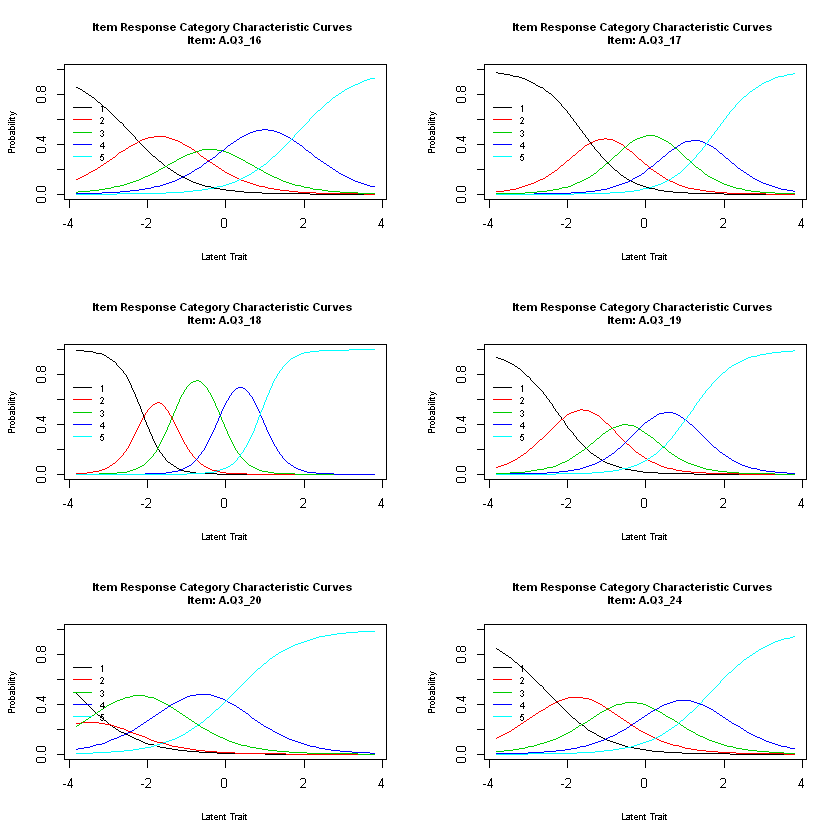

In [28]:
par(mfrow = c(3, 2))
plot(GRM_AQ3_MR1$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

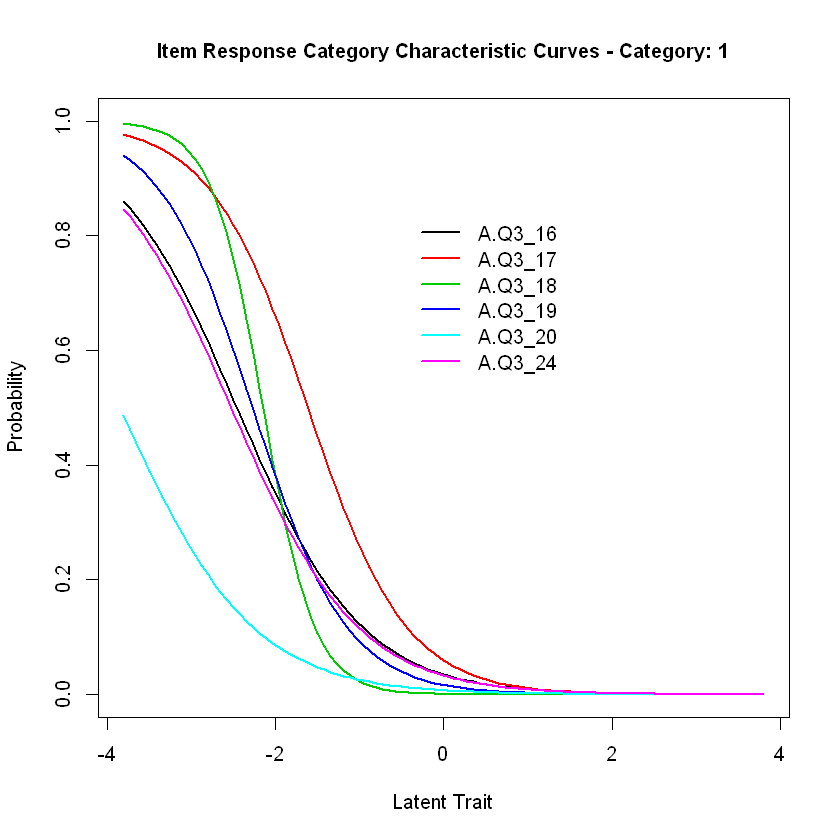

In [29]:
plot(GRM_AQ3_MR1$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [30]:
GRM_AQ3_MR1$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 31.44
Information in (-4, 4) = 30.24 (96.19%)
Based on all the items


In [31]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(2:4))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 20.92
Information in (-4, 4) = 20.76 (99.24%)
Based on items 2, 3, 4


In [32]:
20.92/31.44

[1] 0.6653944

In [89]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(5))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 3.26
Information in (-4, 4) = 2.66 (81.57%)
Based on items 5


In [90]:
3.26/31.44

[1] 0.1036896

Items A_Q3_20 sowie A_Q3_16 und A_Q3_24 tragen weniger zum Informationsgehalt des Faktors bei. (A_Q3_20 wurde von sehr vielen TN gewählt.)

#### GRM MR2

In [35]:
GRM_AQ3_MR2 <- grm_full(MyData,FA_AQ3,'MR2',0.3)

In [36]:
GRM_AQ3_MR2$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.85      0.85    0.85      0.44 5.5 0.013  3.6 0.81

 lower alpha upper     95% confidence boundaries
0.82 0.85 0.87 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_6       0.81      0.81    0.80      0.42 4.3    0.016
A.Q3_7       0.81      0.81    0.79      0.41 4.2    0.016
A.Q3_8       0.80      0.80    0.80      0.41 4.1    0.017
A.Q3_9       0.83      0.83    0.83      0.45 4.9    0.014
A.Q3_10      0.84      0.83    0.83      0.46 5.1    0.014
A.Q3_14      0.84      0.84    0.83      0.46 5.1    0.014
A.Q3_15      0.84      0.84    0.84      0.47 5.3    0.013

 Item statistics 
          n raw.r std.r r.cor r.drop mean  sd
A.Q3_6  332  0.78  0.78  0.76   0.68  3.7 1.1
A.Q3_7  332  0.81  0.80  0.80   0.72  3.5 1.2
A.Q3_8  332  0.82  0.82  0.81   0.73  3.6 1.2
A.Q3_9  332  0.69  

In [37]:
GRM_AQ3_MR2$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik   LRT df p.value
results$fit1 6020.12 6130.56 -2981.06                 
results$fit2 5915.53 6048.81 -2922.76 116.6  6  <0.001



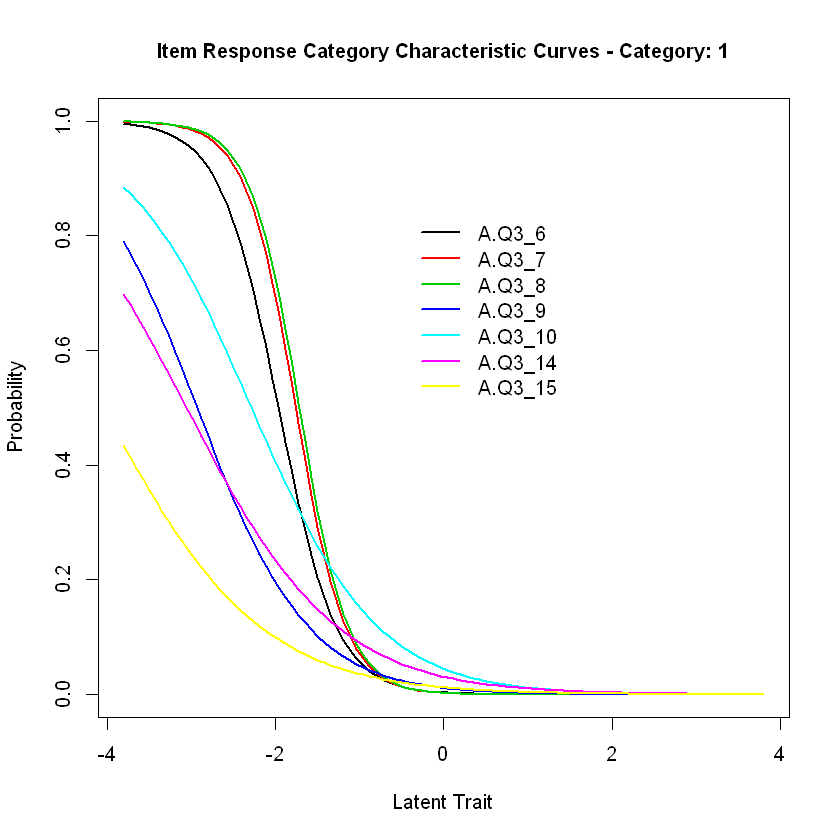

In [38]:
plot(GRM_AQ3_MR2$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [39]:
GRM_AQ3_MR2$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 44.38
Information in (-4, 4) = 42.97 (96.83%)
Based on all the items


In [91]:
information(GRM_AQ3_MR2$fit2, c(-4, 4), items = c(1:3))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 31.24
Information in (-4, 4) = 31.23 (99.96%)
Based on items 1, 2, 3


In [92]:
31.24/44.38

[1] 0.7039207

In [93]:
information(GRM_AQ3_MR2$fit2, c(-4, 4), items = c(6:7))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 5.66
Information in (-4, 4) = 4.71 (83.24%)
Based on items 6, 7


In [94]:
5.66/44.38

[1] 0.1275349

Items A_Q3_14 und A_Q3_15 tragen nur wenig zum Informationsgehalt des Faktors bei. Beide laden auch auf andere Faktoren in ähnlicher Weise, was inhaltlich zu erkären ist.

#### GRM MR3

In [42]:
GRM_AQ3_MR3 <- grm_full(MyData,FA_AQ3,'MR3',0.3)

In [43]:
GRM_AQ3_MR3$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.62      0.63    0.58      0.26 1.7 0.033  3.1 0.74

 lower alpha upper     95% confidence boundaries
0.56 0.62 0.69 

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_1      0.58      0.59    0.53      0.27 1.5    0.037
A.Q3_2      0.54      0.54    0.48      0.23 1.2    0.041
A.Q3_3      0.56      0.57    0.50      0.25 1.3    0.039
A.Q3_4      0.57      0.58    0.52      0.26 1.4    0.038
A.Q3_5      0.59      0.60    0.53      0.27 1.5    0.037

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
A.Q3_1 332  0.62  0.61  0.45   0.35  3.1 1.22
A.Q3_2 332  0.64  0.68  0.57   0.45  4.0 0.94
A.Q3_3 332  0.67  0.65  0.51   0.40  3.0 1.30
A.Q3_4 332  0.63  0.63  0.47   0.37  2.9 1.17
A.Q3_5 332  0.61  0.61  0.43   0.34  2.5 1.22

Non missing response frequency for each item
     

In [44]:
GRM_AQ3_MR3$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik  LRT df p.value
results$fit1 4798.90 4878.87 -2378.45                
results$fit2 4798.91 4894.12 -2374.46 7.98  4   0.092



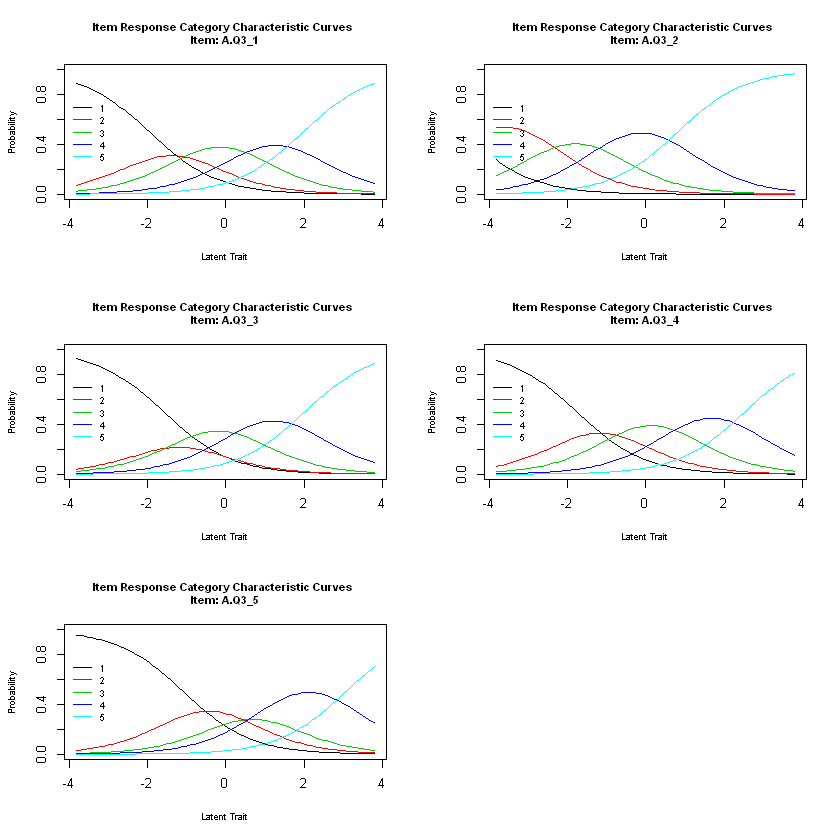

In [45]:
par(mfrow = c(3, 2))
plot(GRM_AQ3_MR3$fit1, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

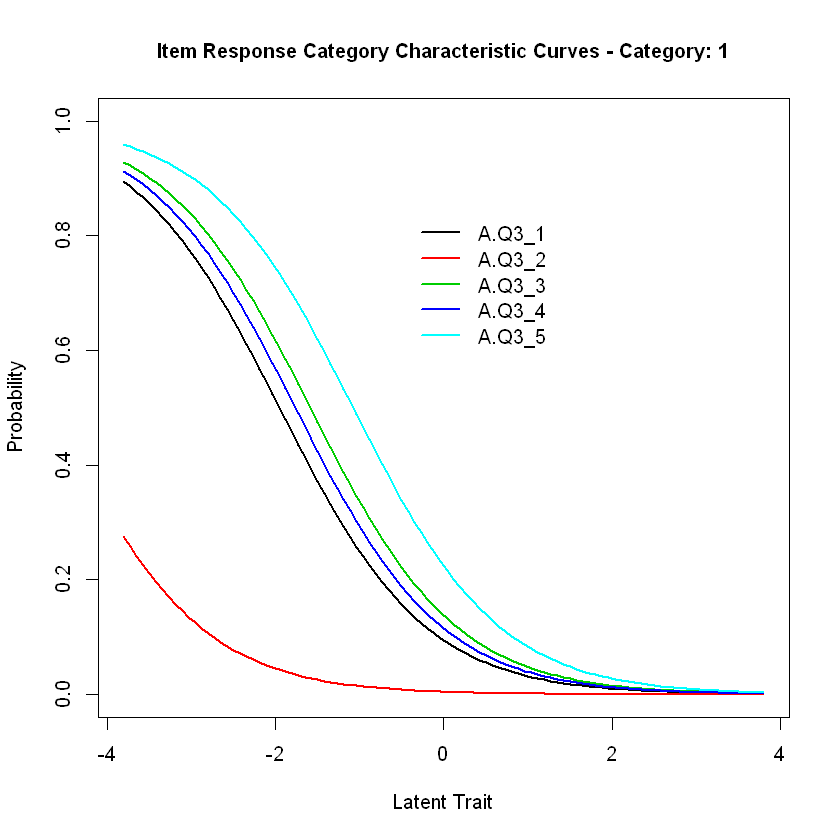

In [46]:
plot(GRM_AQ3_MR3$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [47]:
GRM_AQ3_MR3$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 14.41
Information in (-4, 4) = 12.61 (87.47%)
Based on all the items


In [48]:
information(GRM_AQ3_MR3$fit1, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 3.26
Information in (-4, 4) = 2.42 (74.07%)
Based on items 2


In [49]:
3.26/14.41

[1] 0.2262318

A_Q3_2 trägt 22% zum Informationsgehalt des Faktors bei. (Sehr viele TN haben diese Strategie gewählt.) Der Wert ist ausreichend, zudem kann das Item aus inhaltlichen Gründen nicht entfernt werden.

#### GRM MR4

In [50]:
GRM_AQ3_MR4 <- grm_full(MyData,FA_AQ3,'MR4',0.4)

In [51]:
GRM_AQ3_MR4$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd
      0.78      0.78    0.75      0.47 3.6 0.02  2.9 0.91

 lower alpha upper     95% confidence boundaries
0.74 0.78 0.82 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_10      0.76      0.77    0.70      0.52 3.3    0.023
A.Q3_11      0.67      0.67    0.59      0.40 2.0    0.032
A.Q3_12      0.70      0.70    0.63      0.43 2.3    0.029
A.Q3_13      0.77      0.77    0.71      0.53 3.4    0.022

 Item statistics 
          n raw.r std.r r.cor r.drop mean  sd
A.Q3_10 331  0.73  0.73  0.59   0.51  3.1 1.2
A.Q3_11 331  0.84  0.84  0.79   0.69  3.0 1.2
A.Q3_12 331  0.81  0.81  0.74   0.65  2.9 1.1
A.Q3_13 331  0.73  0.72  0.57   0.50  2.7 1.2

Non missing response frequency for each item
           1    2    3    4    5 miss
A.Q3_10 0.08 0.25 0.27 0.27 0.13 0.01
A.Q3_11 0.12 0.21 0.29 0.26 0.

In [52]:
GRM_AQ3_MR4$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik  LRT df p.value
results$fit1 3710.17 3774.91 -1838.09                
results$fit2 3675.78 3751.94 -1817.89 40.4  3  <0.001



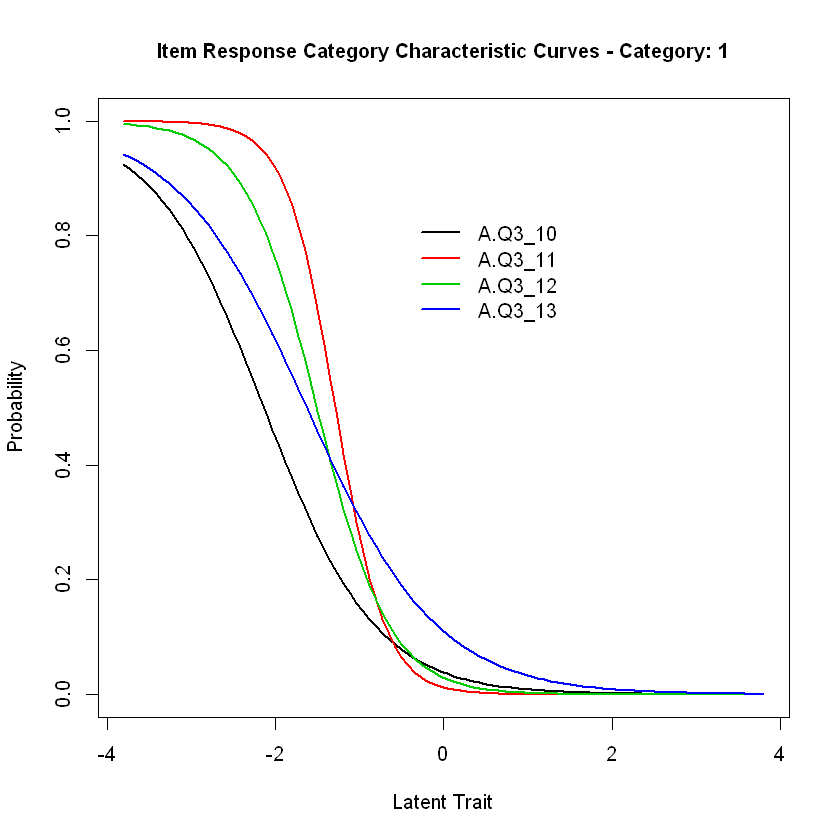

In [53]:
plot(GRM_AQ3_MR4$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR5

In [54]:
GRM_AQ3_MR5 <- grm_full(MyData,FA_AQ3,'MR5',0.3)

Für die Itemanalyse werden hier alle Items, die mit einem Wert von mindestens 0,3 auf den Faktor laden, berücksichtigt. Item A_Q_15 und A_Q_20 werden allerdings einem anderen Faktor zugerechnet. 

In [55]:
GRM_AQ3_MR5$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.75      0.75    0.75      0.28 3.1 0.021  3.7 0.63

 lower alpha upper     95% confidence boundaries
0.71 0.75 0.79 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_28      0.73      0.73    0.72      0.28 2.7    0.023
A.Q3_29      0.71      0.71    0.70      0.26 2.5    0.024
A.Q3_15      0.73      0.73    0.72      0.28 2.7    0.023
A.Q3_20      0.73      0.73    0.71      0.27 2.6    0.023
A.Q3_30      0.74      0.75    0.74      0.30 3.0    0.021
A.Q3_31      0.72      0.73    0.71      0.28 2.7    0.023
A.Q3_26      0.71      0.72    0.70      0.26 2.5    0.024
A.Q3_27      0.74      0.74    0.74      0.29 2.9    0.021

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
A.Q3_28 331  0.61  0.61  0.53   0.45  3.7 1.06
A.Q3_29 331  0.68  0.68  0.62   0.54  3.7 1.04
A.Q

In [56]:
GRM_AQ3_MR5$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik  LRT df p.value
results$fit1 6957.88 7083.55 -3445.94                
results$fit2 6948.28 7100.60 -3434.14 23.6  7   0.001



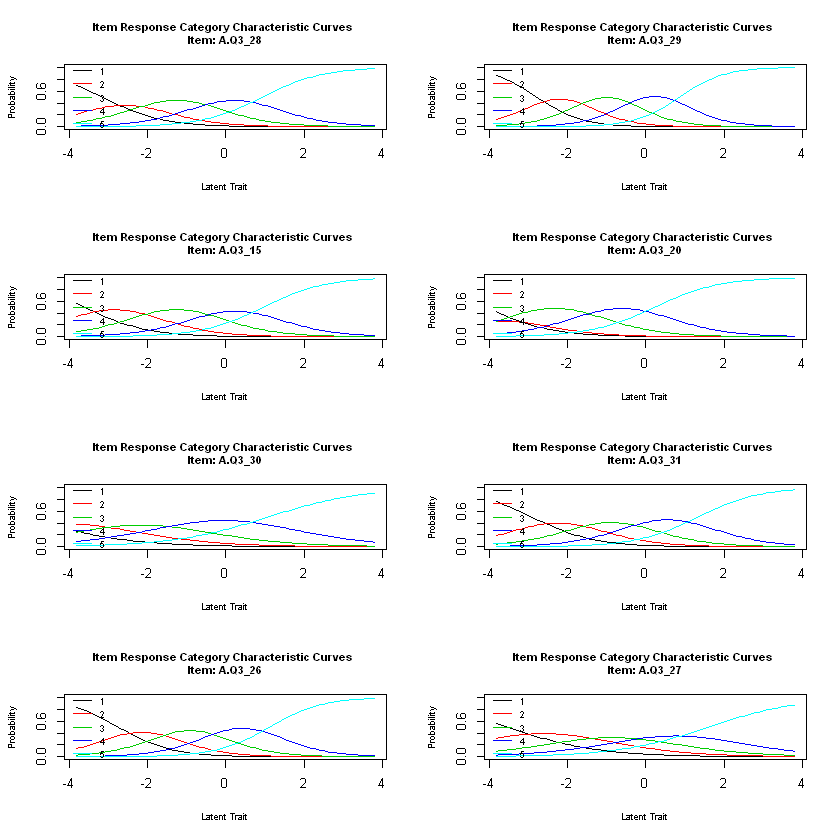

In [57]:
par(mfrow = c(4, 2))
plot(GRM_AQ3_MR5$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

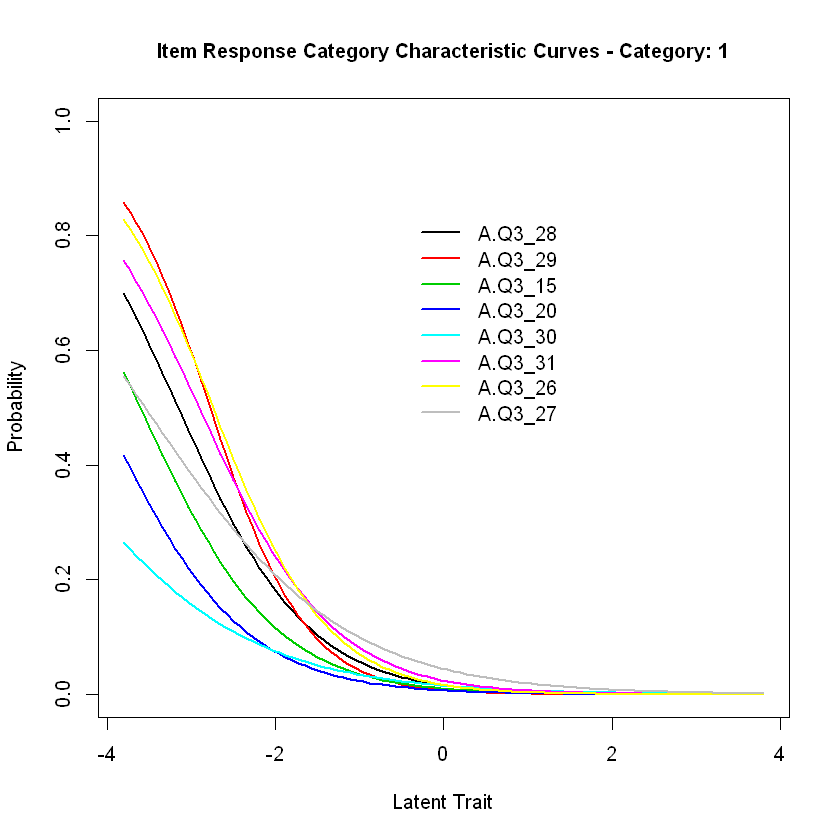

In [58]:
plot(GRM_AQ3_MR5$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [59]:
GRM_AQ3_MR5$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 26.45
Information in (-4, 4) = 23.09 (87.29%)
Based on all the items


In [60]:
information(GRM_AQ3_MR5$fit2, c(-4, 4), items = 7)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 4.01
Information in (-4, 4) = 3.79 (94.55%)
Based on items 7


In [61]:
2.08/26.45

[1] 0.07863894

Item A_Q3_30 trägt weniger zum Informationsgehalt des Faktors bei. (Die Strategie wurde von sehr vielen TN gewählt.)

#### GRM MR6

In [62]:
GRM_AQ3_MR6 <- grm_full(MyData,FA_AQ3,'MR6',0.4)

In [63]:
GRM_AQ3_MR6$alpha


Reliability analysis   
Call: alpha(x = get_datagrm(df, F, f, thr, type = "num"))

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.76      0.76    0.73      0.45 3.2 0.022  3.3 0.85

 lower alpha upper     95% confidence boundaries
0.72 0.76 0.8 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_21      0.76      0.76    0.70      0.51 3.2    0.023
A.Q3_22      0.70      0.70    0.63      0.44 2.4    0.029
A.Q3_23      0.64      0.64    0.54      0.37 1.8    0.034
A.Q3_24      0.72      0.72    0.65      0.46 2.6    0.027

 Item statistics 
          n raw.r std.r r.cor r.drop mean  sd
A.Q3_21 330  0.72  0.70  0.52   0.46  2.7 1.2
A.Q3_22 330  0.77  0.77  0.67   0.57  3.8 1.1
A.Q3_23 330  0.83  0.84  0.79   0.68  3.6 1.1
A.Q3_24 330  0.75  0.75  0.62   0.54  3.3 1.1

Non missing response frequency for each item
           1    2    3    4    5 miss
A.Q3_21 0.17 0.29 0.29 0.16 0.09 0.01
A.Q3_22 0.03 0.11 0.22 0.33 0

In [64]:
GRM_AQ3_MR6$anova


 Likelihood Ratio Table
                 AIC     BIC  log.Lik   LRT df p.value
results$fit1 3584.87 3649.61 -1775.44                 
results$fit2 3551.54 3627.70 -1755.77 39.33  3  <0.001



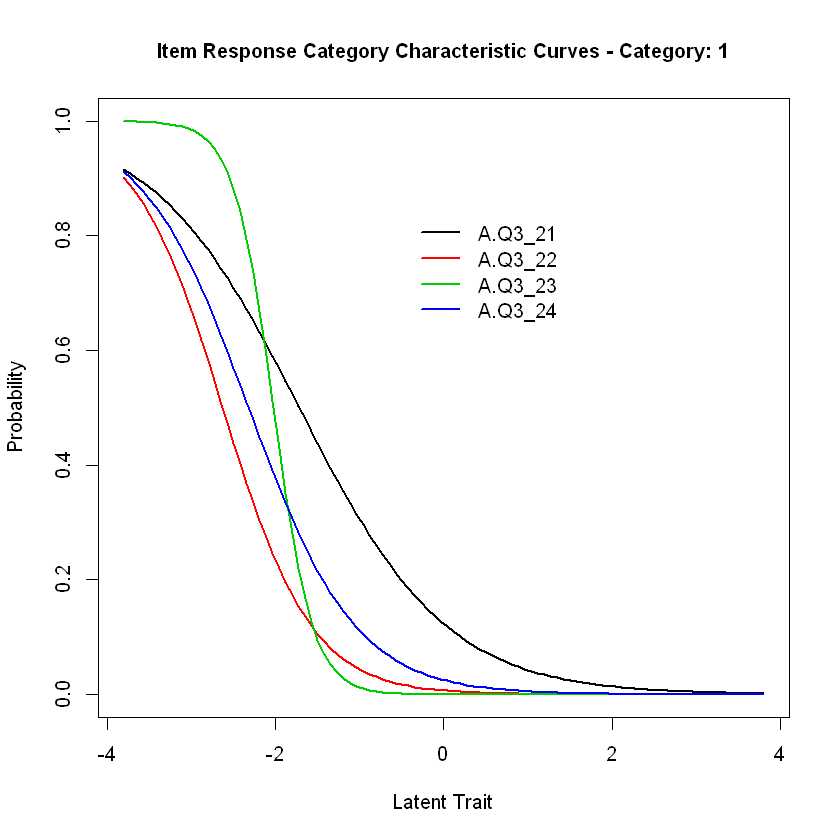

In [65]:
plot(GRM_AQ3_MR6$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

### Konfirmatorische Faktorenanalyse

Verschiedene konfirmatorische Faktorenanalysen werden durchgeführt, um zu überprüfen, wie sich die Eliminierung bestimmter Items auf die Gesamtstruktur des Fragebogens auswirkt.

Aufgrund der Ergebnisse der Itemanalyse:
* A_Q3_14
* A_Q3_15
* A_Q3_20
* A_Q3_30

Aus inhaltlichen Überlegungen (Reduktion der Items):
* A_Q3_25
* A_Q3_6, A_Q3_7, A_Q3_8

In [66]:
get_itemsCFA <- function(vd,vf){
    ind <- match(vd,vf)
    vf[-ind]
}  

In [67]:
items_CFA <- get_itemsCFA(c('A.Q3_7','A.Q3_8'),colnames(MyData)[vec_AQ3])

In [68]:
vec_AQ3cf <- match(items_CFA,colnames(MyData))

Parallel analysis suggests that the number of factors =  6  and the number of components =  5 


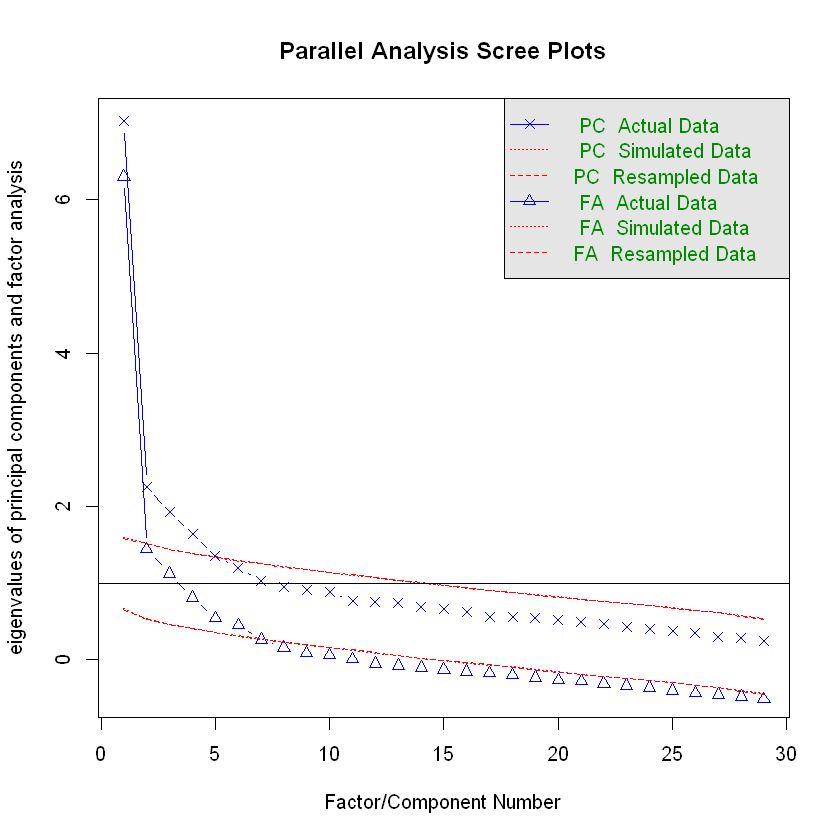

In [69]:
items.parallel1 <- fa.parallel(convert_data(MyData,vec_AQ3cf), fa="both")

In [70]:
FA_AQ3cf <- fa(convert_data(MyData,vec_AQ3cf), nfactors = 6, rotate = "varimax")

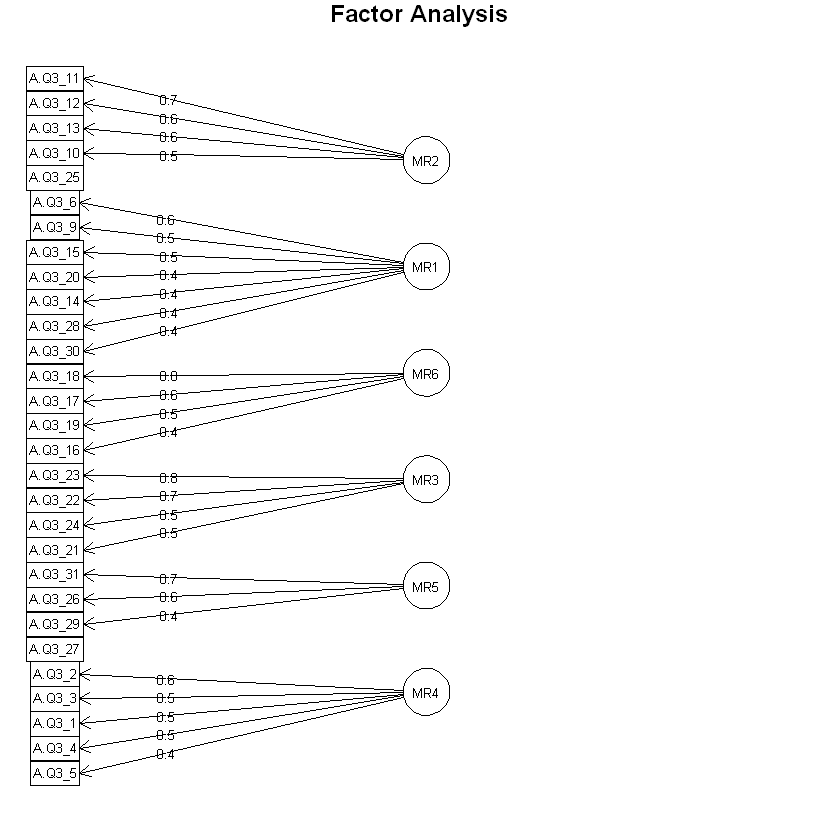

In [71]:
diagram(FA_AQ3cf)

In [72]:
FA_AQ3cf

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3cf), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR1   MR6   MR3   MR5   MR4    h2   u2 com
A.Q3_1   0.00 -0.04  0.05 -0.04  0.02  0.48 0.236 0.76 1.0
A.Q3_2  -0.22  0.17  0.08  0.00  0.05  0.63 0.487 0.51 1.4
A.Q3_3   0.01  0.00  0.13  0.03  0.11  0.51 0.291 0.71 1.2
A.Q3_4   0.10  0.01 -0.06  0.17  0.08  0.47 0.270 0.73 1.5
A.Q3_5   0.34  0.17  0.03  0.08  0.03  0.43 0.335 0.67 2.3
A.Q3_6   0.27  0.62  0.09 -0.07 -0.06  0.07 0.470 0.53 1.5
A.Q3_9   0.20  0.55  0.04  0.05  0.07  0.02 0.353 0.65 1.3
A.Q3_28  0.14  0.37  0.12  0.10  0.29  0.11 0.272 0.73 2.9
A.Q3_10  0.52  0.40  0.02  0.02  0.13 -0.07 0.457 0.54 2.1
A.Q3_11  0.72  0.22  0.09  0.09  0.14  0.01 0.605 0.40 1.3
A.Q3_12  0.63  0.26  0.13  0.03  0.11  0.04 0.499 0.50 1.5
A.Q3_13  0.62  0.11  0.13  0.13 -0.02  0.04 0.428 0.57 1.3
A.Q3_29  0.26  0.37  0.18  0.12  0.38  0.00 0

In [73]:
alpha(data.frame(apply(MyData[,vec_AQ3cf],2,as.numeric)),check.keys=TRUE )


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_AQ3cf], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd
      0.87      0.88    0.91       0.2 7.1 0.0099  3.4 0.53

 lower alpha upper     95% confidence boundaries
0.85 0.87 0.89 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se
A.Q3_1       0.88      0.88    0.91      0.21 7.3   0.0096
A.Q3_2       0.87      0.88    0.91      0.21 7.2   0.0098
A.Q3_3       0.88      0.88    0.91      0.20 7.2   0.0097
A.Q3_4       0.87      0.88    0.91      0.20 7.1   0.0098
A.Q3_5       0.87      0.87    0.90      0.20 6.9   0.0101
A.Q3_6       0.87      0.87    0.90      0.20 6.9   0.0101
A.Q3_9       0.87      0.87    0.90      0.20 6.9   0.0102
A.Q3_28      0.87      0.87    0.90      0.20 6.8   0.0102
A.Q3_10      0.87      0.87    0.90      0.20 6.8   0.0103
A.Q3_11      0.87      0.87    0.90      0.19 6.7   0.0105
A.Q3_1

Die Ergebnisse (KFA und Berechnung von Cronbachs Alpha) zeigen, dass Item A_Q3_20, A_Q3_25 und A_Q3_30 entfernt werden könnten, ohne die Struktur des Fragebogens zu beeinträchtigen.

Items A_Q3_6, A_Q3_7 und A_Q3_8 können nicht ohne Weiteres auf ein Item reduziert werden. Das Entfernen eines oder mehrerer dieser Items beeinträchtigt die Struktur.

Die Entfernung eines oder beider der Items A_Q3_14 und A_Q3_15 würde ebenfalls die Struktur beeinflussen.

### GRM CQ1

In [74]:
GRM_CQ1 <- data.frame(apply(MyData[,vec_CQ1],2,as.factor))

In [75]:
alpha(data.frame(apply(MyData[,vec_CQ1],2,as.numeric)),check.keys=TRUE )

Warning message in alpha(data.frame(apply(MyData[, vec_CQ1], 2, as.numeric)), check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_CQ1], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd
      0.57      0.62    0.63      0.19 1.6 0.036  3.9 0.51

 lower alpha upper     95% confidence boundaries
0.5 0.57 0.65 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r  S/N alpha se
C.Q1_1       0.54      0.59    0.59      0.19 1.41    0.040
C.Q1_2       0.55      0.60    0.61      0.20 1.48    0.039
C.Q1_3       0.57      0.61    0.61      0.21 1.57    0.037
C.Q1_4       0.50      0.54    0.55      0.16 1.17    0.044
C.Q1_5       0.46      0.49    0.49      0.14 0.96    0.047
C.Q1_6       0.51      0.57    0.58      0.18 1.30    0.042
C.Q1_7-      0.62      0.65    0.65      0.23 1.83    0.033

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
C.Q1_1  325  0.52  0.54  0.42   0.30  3.5 0.89
C.Q1_2  325  0.53  0.51  0.35   0.26  3.6 1.10
C.Q1_3  325  0.49  0

In [76]:
rcor.test(GRM_CQ1, method = "kendall")


       C.Q1_1 C.Q1_2 C.Q1_3 C.Q1_4 C.Q1_5 C.Q1_6 C.Q1_7
C.Q1_1  *****     NA     NA     NA     NA     NA     NA
C.Q1_2  0.154  *****     NA     NA     NA     NA     NA
C.Q1_3 <0.001  0.962  *****     NA     NA     NA     NA
C.Q1_4 <0.001  0.002  0.002  *****     NA     NA     NA
C.Q1_5 <0.001 <0.001 <0.001 <0.001  *****     NA     NA
C.Q1_6  0.194 <0.001  0.381 <0.001 <0.001  *****     NA
C.Q1_7  0.051  0.091  0.323 <0.001  0.017 <0.001  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


In [77]:
fit1_C <- grm(GRM_CQ1, constrained = TRUE)
fit2_C <- grm(GRM_CQ1, constrained = FALSE)

In [78]:
anova(fit1_C,fit2_C)


 Likelihood Ratio Table
           AIC     BIC  log.Lik    LRT df p.value
fit1_C 5625.94 5736.38 -2783.97                  
fit2_C 5480.37 5613.65 -2705.18 157.58  6  <0.001



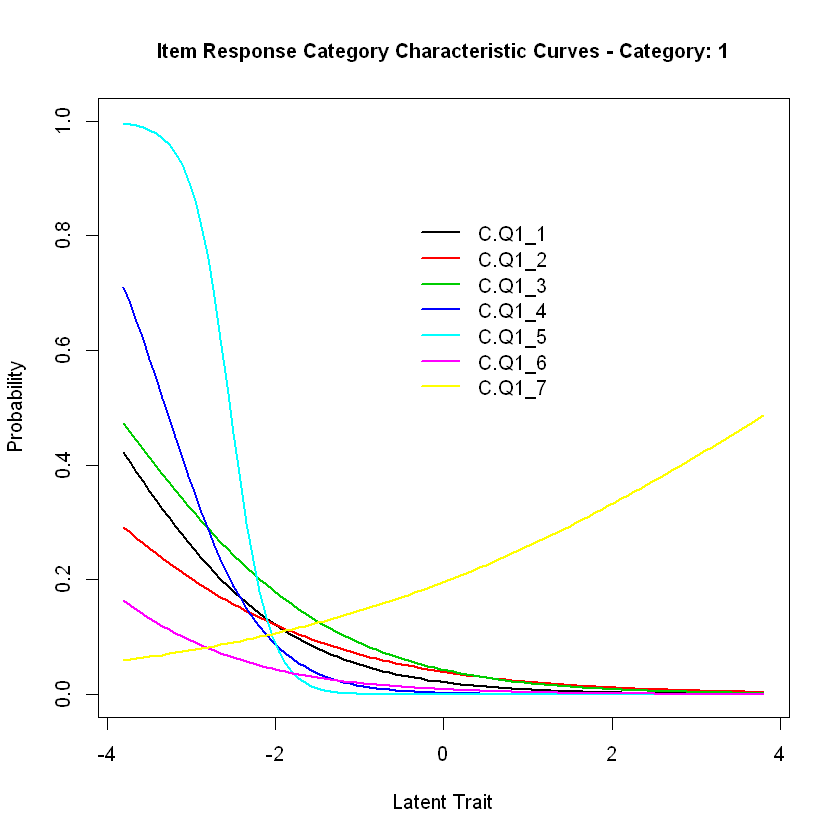

In [79]:
plot(fit2_C, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

### GRM AQ2

In [80]:
GRM_AQ2 <- data.frame(apply(MyData[,vec_AQ2],2,as.factor))

In [81]:
alpha(data.frame(apply(MyData[,vec_AQ2],2,as.numeric)),check.keys=TRUE )

Warning message in alpha(data.frame(apply(MyData[, vec_AQ2], 2, as.numeric)), check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."


Reliability analysis   
Call: alpha(x = data.frame(apply(MyData[, vec_AQ2], 2, as.numeric)), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r  S/N   ase mean  sd
       0.5       0.5    0.54      0.12 0.98 0.042    3 0.5

 lower alpha upper     95% confidence boundaries
0.42 0.5 0.58 

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r  S/N alpha se
A.Q2_1       0.50      0.49    0.53      0.14 0.96    0.042
A.Q2_2       0.42      0.41    0.45      0.10 0.69    0.049
A.Q2_3       0.45      0.45    0.46      0.12 0.81    0.046
A.Q2_4       0.44      0.44    0.46      0.11 0.77    0.047
A.Q2_5-      0.46      0.47    0.49      0.13 0.87    0.046
A.Q2_6-      0.41      0.42    0.45      0.11 0.72    0.050
A.Q2_7-      0.52      0.52    0.55      0.15 1.10    0.041

 Item statistics 
          n raw.r std.r r.cor r.drop mean   sd
A.Q2_1  333  0.45  0.44  0.23  0.155  2.5 1.09
A.Q2_2  333  0.55  0.58  0.48  0.337  3.6 0.87
A.Q2_3  333  0.51  0

In [82]:
rcor.test(GRM_AQ2, method = "kendall")


       A.Q2_1 A.Q2_2 A.Q2_3 A.Q2_4 A.Q2_5 A.Q2_6 A.Q2_7
A.Q2_1  *****  0.251  0.014  0.027 -0.022 -0.053 -0.121
A.Q2_2 <0.001  *****  0.212  0.159 -0.011 -0.098 -0.202
A.Q2_3  0.758 <0.001  *****  0.463 -0.038 -0.136  0.104
A.Q2_4  0.559  0.001 <0.001  ***** -0.055 -0.134  0.058
A.Q2_5  0.628  0.812  0.410  0.238  *****  0.412  0.067
A.Q2_6  0.243  0.035  0.003  0.004 <0.001  *****  0.086
A.Q2_7  0.011 <0.001  0.030  0.228  0.161  0.069  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


In [83]:
fit1_AQ2 <- grm(GRM_AQ2, constrained = TRUE)
fit2_AQ2 <- grm(GRM_AQ2, constrained = FALSE)

In [84]:
anova(fit1_AQ2,fit2_AQ2)


 Likelihood Ratio Table
             AIC     BIC  log.Lik    LRT df p.value
fit1_AQ2 6580.00 6690.43 -3261.00                  
fit2_AQ2 6150.97 6284.25 -3040.48 441.03  6  <0.001



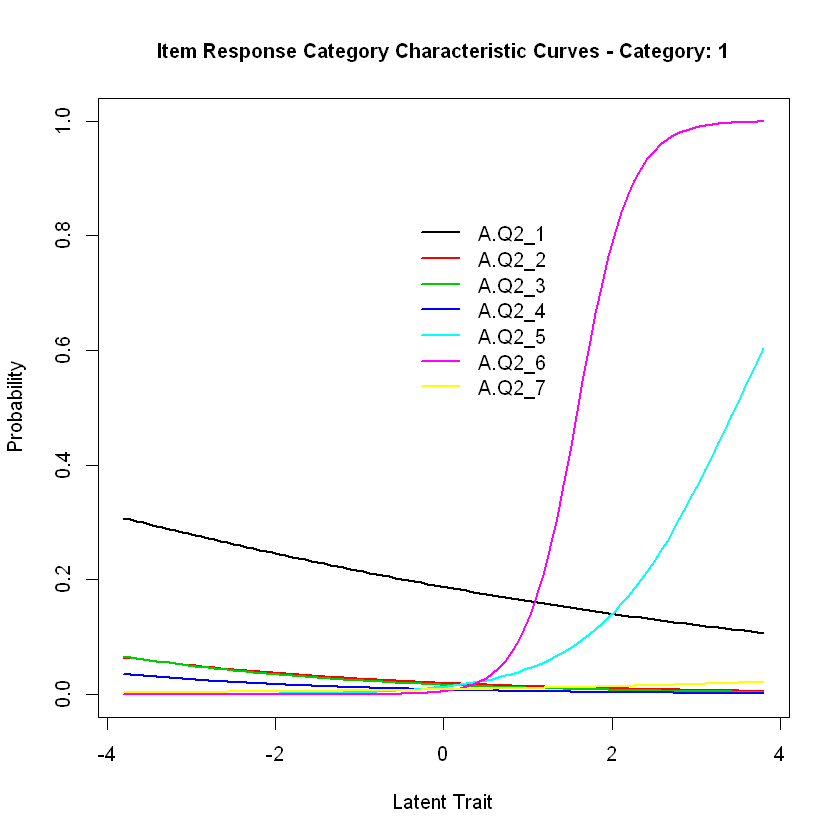

In [85]:
plot(fit2_AQ2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)